In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Choose 5 international indices and 5 equities from yfinance
indices = ['^GSPC', '^DJI', '^IXIC', '^FTSE', '^N225']
equities = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']

In [3]:
# Load the daily data since "2010-01-01" till "2023-05-01"
data = pd.DataFrame()
for index in indices:
    data[index] = yf.download(index, start='2010-01-01', end='2023-05-01')['Adj Close']
for equity in equities:
    data[equity] = yf.download(equity, start='2010-01-01', end='2023-05-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate the daily returns
daily_returns = data.pct_change()

# Calculate the cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

In [5]:
# Calculate the max drawdowns
max_drawdowns = pd.DataFrame()
for index in indices:
    max_drawdowns[index] = cumulative_returns[index].min() / cumulative_returns[index].max() - 1
for equity in equities:
    max_drawdowns[equity] = cumulative_returns[equity].min() / cumulative_returns[equity].max() - 1

In [6]:
# Calculate the Sharpe Ratio
sharpe_ratio = (daily_returns - 0.001).mean() / daily_returns.std()

# Calculate the Sortino Ratio
sortino_ratio = (daily_returns - 0.001).mean() / daily_returns[daily_returns < 0].std()

In [7]:
# Print the results
print('Daily Returns:')
print(daily_returns)
print('Cumulative Returns:')
print(cumulative_returns)
print('Max Drawdowns:')
print(max_drawdowns)
print('Sharpe Ratio:')
print(sharpe_ratio)
print('Sortino Ratio:')
print(sortino_ratio)

Daily Returns:
                              ^GSPC      ^DJI     ^IXIC  ^FTSE  ^N225  \
Date                                                                    
2010-01-04 00:00:00-05:00       NaN       NaN       NaN    NaN    NaN   
2010-01-05 00:00:00-05:00  0.003116 -0.001128  0.000126    NaN    NaN   
2010-01-06 00:00:00-05:00  0.000546  0.000157 -0.003300    NaN    NaN   
2010-01-07 00:00:00-05:00  0.004001  0.003138 -0.000452    NaN    NaN   
2010-01-08 00:00:00-05:00  0.002882  0.001068  0.007443    NaN    NaN   
...                             ...       ...       ...    ...    ...   
2023-04-24 00:00:00-04:00  0.000852  0.001965 -0.002921    NaN    NaN   
2023-04-25 00:00:00-04:00 -0.015811 -0.010172 -0.019775    NaN    NaN   
2023-04-26 00:00:00-04:00 -0.003841 -0.006828  0.004677    NaN    NaN   
2023-04-27 00:00:00-04:00  0.019566  0.015744  0.024286    NaN    NaN   
2023-04-28 00:00:00-04:00  0.008253  0.008041  0.006946    NaN    NaN   

                               AAPL

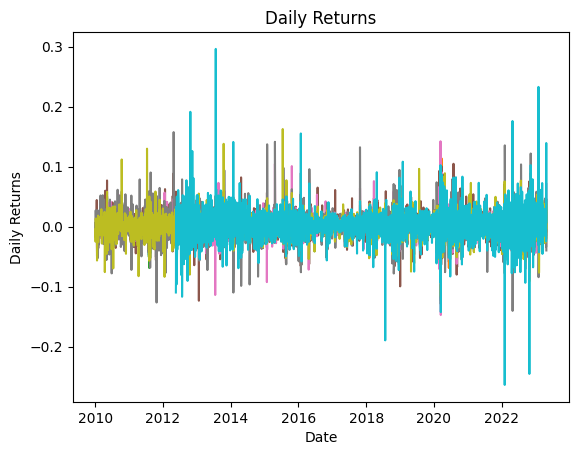

In [8]:
# Plot the daily returns
plt.plot(daily_returns)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns')
plt.show()

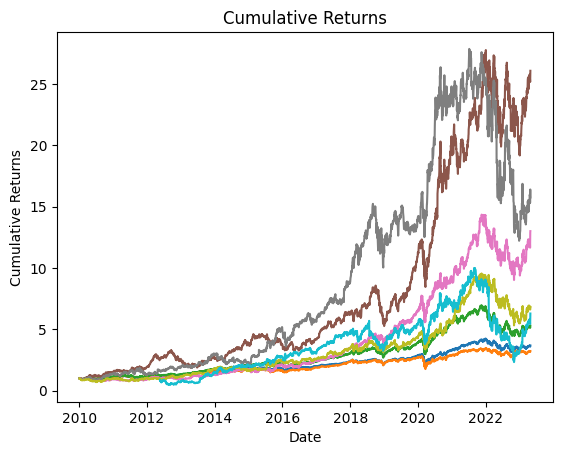

In [9]:
# Plot the cumulative returns
plt.plot(cumulative_returns)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns')
plt.show()

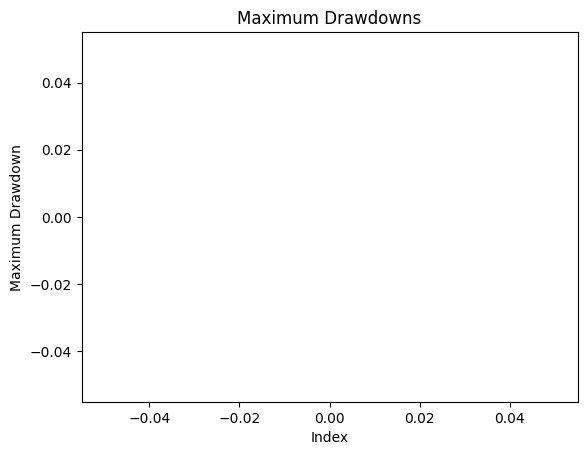

In [10]:
# Plot the maximum drawdowns
plt.plot(max_drawdowns)
plt.xlabel('Index')
plt.ylabel('Maximum Drawdown')
plt.title('Maximum Drawdowns')
plt.show()

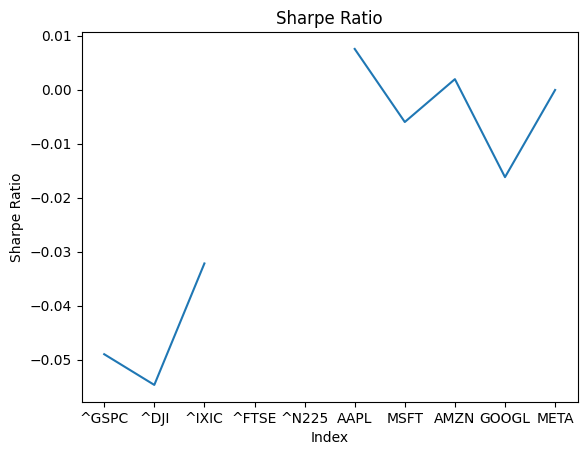

In [11]:
# Plot the Sharpe Ratio
plt.plot(sharpe_ratio)
plt.xlabel('Index')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio')
plt.show()


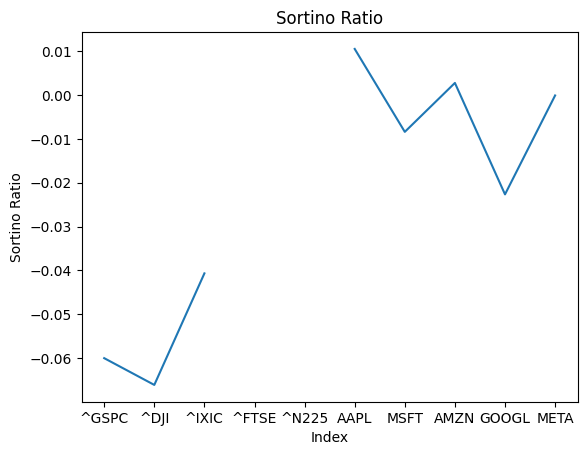

In [12]:
# Plot the Sortino Ratio
plt.plot(sortino_ratio)
plt.xlabel('Index')
plt.ylabel('Sortino Ratio')
plt.title('Sortino Ratio')
plt.show()